### Student Information
Name: 李其霖

Student ID: 107041033

GitHub ID: LiChiLin

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [2]:
### Begin Assignment Here

In [3]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

## 1. The Data
Reading data from the newdataset.

In [4]:
## read all the data
import numpy as np
import pandas as pd
data_amazon = pd.read_csv('amazon_cells_labelled.txt', delimiter = "\t")
data_amazon.columns = ["sentence", "score"]
data_amazon["website"] = "amazon"
data_imdb = pd.read_csv('imdb_labelled.txt', delimiter = "\t")
data_imdb.columns = ["sentence", "score"]
data_imdb["website"] = "imdb"
data_yelp = pd.read_csv('yelp_labelled.txt', delimiter = "\t")
data_yelp.columns = ["sentence", "score"]
data_yelp["website"] = "yelp"

## 2. Data Preparation
Concat all the data and label it

In [5]:
## concat all the data
data = pd.concat([data_amazon, data_imdb])
data = pd.concat([data, data_yelp])
data = data.reset_index()
data = data.drop(['index'], axis=1)
data

,sentence,score,website
0,"Good case, Excellent value.",1,amazon
1,Great for the jawbone.,1,amazon
2,Tied to charger for conversations lasting more...,0,amazon
3,The mic is great.,1,amazon
4,I have to jiggle the plug to get it to line up...,0,amazon
...,...,...,...
2740,I think food should have flavor and texture an...,0,yelp
2741,Appetite instantly gone.,0,yelp
2742,Overall I was not impressed and would not go b...,0,yelp
2743,"The whole experience was underwhelming, and I ...",0,yelp


In [6]:
len(data)

2745

In [7]:
# An example of what the subset contains
print("\n".join(data["sentence"][0].split("\n")))

Good case, Excellent value.


In [8]:
# target name
print(data["website"][0])

amazon


In [9]:
# category of first 10 documents.
data["website"][:10]

0    amazon
1    amazon
2    amazon
3    amazon
4    amazon
5    amazon
6    amazon
7    amazon
8    amazon
9    amazon
Name: website, dtype: object

In [10]:
for t in range(10):
    print(data["website"][t])

amazon
amazon
amazon
amazon
amazon
amazon
amazon
amazon
amazon
amazon


### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [11]:
# Answer here
for i in range(3):
    print("\n".join(data["sentence"][i].split("\n")))

Good case, Excellent value.
Great for the jawbone.
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!


## 3. Data Transformation

### 3.1 Converting Dictionary into Pandas Dataframe

In [12]:
data = pd.DataFrame(data)

In [13]:
data[0:2]

,sentence,score,website
0,"Good case, Excellent value.",1,amazon
1,Great for the jawbone.,1,amazon


In [14]:
for t in data["sentence"][:3]:
    print(t)

Good case, Excellent value.
Great for the jawbone.
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!


### Adding Columns

In [15]:
## I have already added column in the previous step.
data[0:10]

,sentence,score,website
0,"Good case, Excellent value.",1,amazon
1,Great for the jawbone.,1,amazon
2,Tied to charger for conversations lasting more...,0,amazon
3,The mic is great.,1,amazon
4,I have to jiggle the plug to get it to line up...,0,amazon
5,If you have several dozen or several hundred c...,0,amazon
6,If you are Razr owner...you must have this!,1,amazon
7,"Needless to say, I wasted my money.",0,amazon
8,What a waste of money and time!.,0,amazon
9,And the sound quality is great.,1,amazon


### 3.2 Familiarizing yourself with the Data

In [16]:
# a simple query
data[:10][["sentence","website"]]

,sentence,website
0,"Good case, Excellent value.",amazon
1,Great for the jawbone.,amazon
2,Tied to charger for conversations lasting more...,amazon
3,The mic is great.,amazon
4,I have to jiggle the plug to get it to line up...,amazon
5,If you have several dozen or several hundred c...,amazon
6,If you are Razr owner...you must have this!,amazon
7,"Needless to say, I wasted my money.",amazon
8,What a waste of money and time!.,amazon
9,And the sound quality is great.,amazon


#### Let's query the last 10 records

In [17]:
data[-10:]

,sentence,score,website
2735,The refried beans that came with my meal were ...,0,yelp
2736,Spend your money and time some place else.,0,yelp
2737,A lady at the table next to us found a live gr...,0,yelp
2738,the presentation of the food was awful.,0,yelp
2739,I can't tell you how disappointed I was.,0,yelp
2740,I think food should have flavor and texture an...,0,yelp
2741,Appetite instantly gone.,0,yelp
2742,Overall I was not impressed and would not go b...,0,yelp
2743,"The whole experience was underwhelming, and I ...",0,yelp
2744,"Then, as if I hadn't wasted enough of my life ...",0,yelp


In [18]:
# using loc (by label)
data.loc[:10, 'sentence']

0                           Good case, Excellent value.
1                                Great for the jawbone.
2     Tied to charger for conversations lasting more...
3                                     The mic is great.
4     I have to jiggle the plug to get it to line up...
5     If you have several dozen or several hundred c...
6           If you are Razr owner...you must have this!
7                   Needless to say, I wasted my money.
8                      What a waste of money and time!.
9                       And the sound quality is great.
10    He was very impressed when going from the orig...
Name: sentence, dtype: object

In [19]:
# using iloc (by position)
data.iloc[:10, 0]

0                          Good case, Excellent value.
1                               Great for the jawbone.
2    Tied to charger for conversations lasting more...
3                                    The mic is great.
4    I have to jiggle the plug to get it to line up...
5    If you have several dozen or several hundred c...
6          If you are Razr owner...you must have this!
7                  Needless to say, I wasted my money.
8                     What a waste of money and time!.
9                      And the sound quality is great.
Name: sentence, dtype: object

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [20]:
#Answer here
data["sentence"][:10]

0                          Good case, Excellent value.
1                               Great for the jawbone.
2    Tied to charger for conversations lasting more...
3                                    The mic is great.
4    I have to jiggle the plug to get it to line up...
5    If you have several dozen or several hundred c...
6          If you are Razr owner...you must have this!
7                  Needless to say, I wasted my money.
8                     What a waste of money and time!.
9                      And the sound quality is great.
Name: sentence, dtype: object

### ** >>> Exercise 3 (5 min): **  
Try to fetch records belonging to the ```yelp``` category, and query every 10th record. Only show the first 5 records.

In [21]:
# Answer here
cnt=0
import copy
tmp_X = copy.deepcopy(data[data["website"]=="yelp"])
for i in range(len(data["website"])):
    if(i%9==0):
        print(tmp_X.iloc[i,:])
        cnt= cnt+1
    if(cnt==5): break

sentence    Crust is not good.
score                        0
website                   yelp
Name: 1746, dtype: object
sentence    Service was very prompt.
score                              1
website                         yelp
Name: 1755, dtype: object
sentence    did not like at all.
score                          0
website                     yelp
Name: 1764, dtype: object
sentence    Took an hour to get our food only 4 tables in ...
score                                                       0
website                                                  yelp
Name: 1773, dtype: object
sentence    Poor service, the waiter made me feel like I w...
score                                                       0
website                                                  yelp
Name: 1782, dtype: object


## 4. Data Mining using Pandas

### 4.1 Missing Values

In [22]:
# check missing values
data.isnull()

,sentence,score,website
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2740,False,False,False
2741,False,False,False
2742,False,False,False
2743,False,False,False


In [23]:
import helpers.data_mining_helpers as dmh
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,website
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [24]:
# Answer here
f = (lambda x: dmh.check_missing_values(x))
data.isnull().apply(f, axis=0)

,sentence,score,website
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [25]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "score"])

In [26]:
dummy_series

sentence    dummy_record
score                  1
dtype: object

In [27]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

,sentence,score
0,dummy_record,1


In [28]:
result_with_series = pd.concat([data, dummy_series.to_frame().T], ignore_index=True)

In [29]:
# check if the records was commited into result
len(result_with_series)

2746

In [30]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,website
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [31]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record',
               'score': 1
              }]

In [32]:
data = pd.concat([data, pd.DataFrame(dummy_dict)], ignore_index=True)

In [33]:
len(data)

2746

In [34]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,website
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [35]:
data.dropna(inplace=True)

In [36]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,website
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [37]:
len(data)

2745

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [38]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [39]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Answer here
Since the column 2 is not np.nan, and the value is an string, so this is the reason why np.null not work.

Since the column 3 is not None, and the value is an string, so this is the reason why np.null not work. 

Since the column 5 is not really empty value, and the value is an string, so this is the reason why np.null not work. 

### 4.2 Dealing with Duplicate Data
Dealing with duplicate data is just as painful as dealing with missing data. The worst case is that you have duplicate data that has missing values. But let us not get carried away. Let us stick with the basics. As we have learned in our Data Mining course, duplicate data can occur because of many reasons. The majority of the times it has to do with how we store data or how we collect and merge data. For instance, we may have collected and stored a tweet, and a retweet of that same tweet as two different records; this results in a case of data duplication; the only difference being that one is the original tweet and the other the retweeted one. Here you will learn that dealing with duplicate data is not as challenging as missing values. But this also all depends on what you consider as duplicate data, i.e., this all depends on your criteria for what is considered as a duplicate record and also what type of data you are dealing with. For textual data, it may not be so trivial as it is for numerical values or images. Anyhow, let us look at some code on how to deal with duplicate records in our `X` dataframe.

In [40]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2740    False
2741    False
2742    False
2743    False
2744    False
Length: 2745, dtype: bool

In [41]:
sum(data.duplicated())

17

In [42]:
sum(data.duplicated('sentence'))

17

In [43]:
dummy_duplicate_dict = [{
                             'sentence': 'dummy record',
                             'score': 1, 
                             'website': "dummy category"
                        },
                        {
                             'sentence': 'dummy record',
                             'score': 1, 
                             'website': "dummy category"
                        }]

In [44]:
data = pd.concat([data, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [45]:
len(data)

2747

In [46]:
sum(data.duplicated('sentence'))

18

In [47]:
data.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [48]:
len(data)

2711

## 5.  Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to perform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

### 5.1 Sampling
The first concept that we are going to cover from the above list is sampling. Sampling refers to the technique used for selecting data. The functionalities that we use to  selected data through queries provided by Pandas are actually basic methods for sampling. The reasons for sampling are sometimes due to the size of data -- we want a smaller subset of the data that is still representatitive enough as compared to the original dataset. 

We don't have a problem of size in our current dataset since it is just a couple thousand records long. But if we pay attention to how much content is included in the `text` field of each of those records, you will realize that sampling may not be a bad idea after all. In fact, we have already done some sampling by just reducing the records we are using here in this notebook; remember that we are only using four categories from the all the 20 categories available. Let us get an idea on how to sample using pandas operations.

In [49]:
X_sample = data.sample(n=1000) #random state

In [50]:
len(X_sample)

1000

In [51]:
X_sample[0:4]

,sentence,score,website
1520,That's how I'd describe this painfully dreary ...,0,imdb
110,This phone is slim and light and the display i...,1,amazon
1151,"Even if you love bad movies, do not watch this...",0,imdb
2355,!....THE OWNERS REALLY REALLY need to quit bei...,0,yelp


### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

### Answer here

Since the X_sample is random state, so every time X datafrome would select different row in any single time. 



Let's do something cool here while we are working with sampling! Let us look at the distribution of categories in both the sample and original dataset. Let us visualize and analyze the disparity between the two datasets. To generate some visualizations, we are going to use `matplotlib` python library. With matplotlib, things are faster and compatability-wise it may just be the best visualization library for visualizing content extracted from dataframes and when using Jupyter notebooks. Let's take a loot at the magic of `matplotlib` below.

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
website = ["amazon", "imdb", "yelp"]

yelp      991
amazon    979
imdb      741
Name: website, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

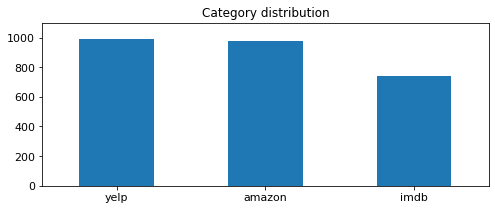

In [54]:
print(data["website"].value_counts())

# plot barchart for X
data["website"].value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1100],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

yelp      362
amazon    352
imdb      286
Name: website, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

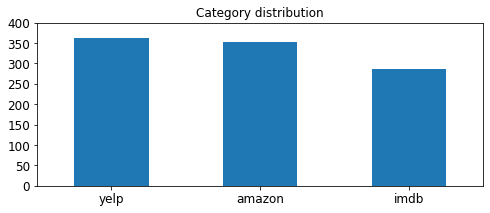

In [55]:
print(X_sample["website"].value_counts())

# plot barchart for X_sample
X_sample["website"].value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 400], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<AxesSubplot:title={'center':'Category distribution'}>

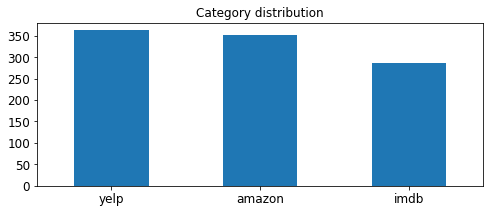

In [56]:
# Answer here

# plot barchart for X_sample

X_sample["website"].value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
#                                            ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<AxesSubplot:title={'center':'Category distribution'}>

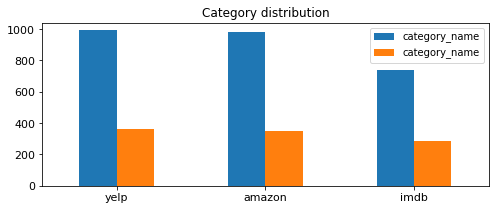

In [57]:
# Answer here
graph_df = data["website"].value_counts().rename('X.category_name').to_frame()\
               .join(X_sample["website"].value_counts().rename('X_sample').to_frame())
graph_df = graph_df.rename(columns={'X.category_name': 'category_name', 'X_sample': 'category_name'})

graph_df.plot(kind = 'bar',
            title = 'Category distribution',
#                                     ylim = [0, 650],        
            rot = 0, fontsize = 11, figsize = (8,3))

### 5.2 Feature Creation
The other operation from the list above that we are going to practise on is the so-called feature creation. As the name suggests, in feature creation we are looking at creating new interesting and useful features from the original dataset; a feature which captures the most important information from the raw information we already have access to. In our `X` table, we would like to create some features from the `text` field, but we are still not sure what kind of features we want to create. We can think of an interesting problem we want to solve, or something we want to analyze from the data, or some questions we want to answer. This is one process to come up with features -- this process is usually called `feature engineering` in the data science community. 

We know what feature creation is so let us get real involved with our dataset and make it more interesting by adding some special features or attributes if you will. First, we are going to obtain the **unigrams** for each text. (Unigram is just a fancy word we use in Text Mining which stands for 'tokens' or 'individual words'.) Yes, we want to extract all the words found in each text and append it as a new feature to the pandas dataframe. The reason for extracting unigrams is not so clear yet, but we can start to think of obtaining some statistics about the articles we have: something like **word distribution** or **word frequency**.

Before going into any further coding, we will also introduce a useful text mining library called [NLTK](http://www.nltk.org/). The NLTK library is a natural language processing tool used for text mining tasks, so might as well we start to familiarize ourselves with it from now (It may come in handy for the final project!). In partcular, we are going to use the NLTK library to conduct tokenization because we are interested in splitting a sentence into its individual components, which we refer to as words, emojis, emails, etc. So let us go for it! We can call the `nltk` library as follows:

```python
import nltk
```

In [58]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
# takes a like a minute or two to process
data['unigrams'] = data['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [60]:
data[0:4]["unigrams"]

0                 [Good, case, ,, Excellent, value, .]
1                        [Great, for, the, jawbone, .]
2    [Tied, to, charger, for, conversations, lastin...
3                             [The, mic, is, great, .]
Name: unigrams, dtype: object

In [61]:
data[0:4]

,sentence,score,website,unigrams
0,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
1,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"
2,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin..."
3,The mic is great.,1,amazon,"[The, mic, is, great, .]"


In [62]:
list(data[0:1]['unigrams'])

[['Good', 'case', ',', 'Excellent', 'value', '.']]

### 5.3 Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data.sentence) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 1988)	1
  (0, 711)	1
  (0, 1598)	1
  (0, 4855)	1


In [64]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [138]:
# Answer here
X_new = analyze(data.sentence[0])
print(X_new)

['good', 'case', 'excellent', 'value']


In [139]:
# We can check the shape of this matrix by:
X_counts.shape

(2711, 5149)

In [140]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [141]:
X_counts.shape

(2711, 5149)

In [142]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [143]:
count_vect.get_feature_names()[0:1]

['00']

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [148]:
# Answer here
cnt=0
for list_1 in X_counts[2, 0:100].toarray() :
    for num_1 in list_1:
        if(num_1 ==1):
            print(cnt)
            print(num_1)
        cnt=cnt+1
count_vect.get_feature_names()[45]

45
1


'45'

In [149]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [150]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]

In [151]:
plot_z = X_counts[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

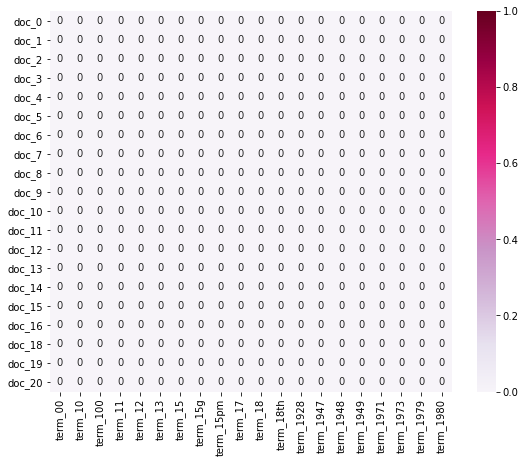

In [152]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

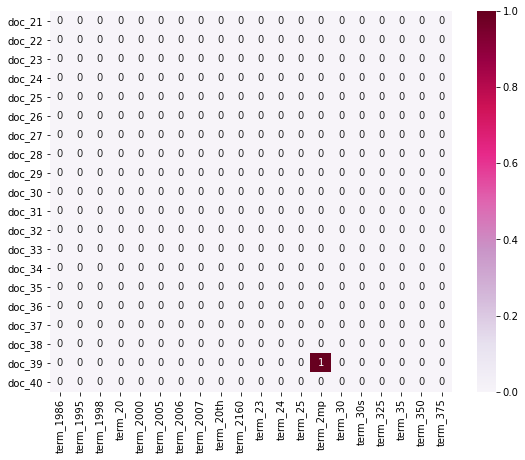

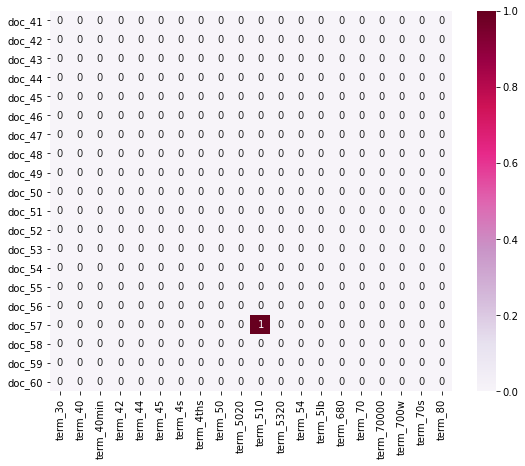

In [155]:
## try to print item 20 by 20, since the data is too large, this is a more efficient way
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[20:40]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(data.index)[20:40]]

plot_z = X_counts[20:40, 20:40].toarray()
plot_z

# Answer here
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[40:60]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(data.index)[40:60]]

plot_z = X_counts[40:60, 40:60].toarray()
plot_z

# Answer here
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficiently reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset. 

In [156]:
from sklearn.decomposition import PCA

In [157]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [158]:
X_reduced.shape

(2711, 2)

In [159]:
website

['amazon', 'imdb', 'yelp']

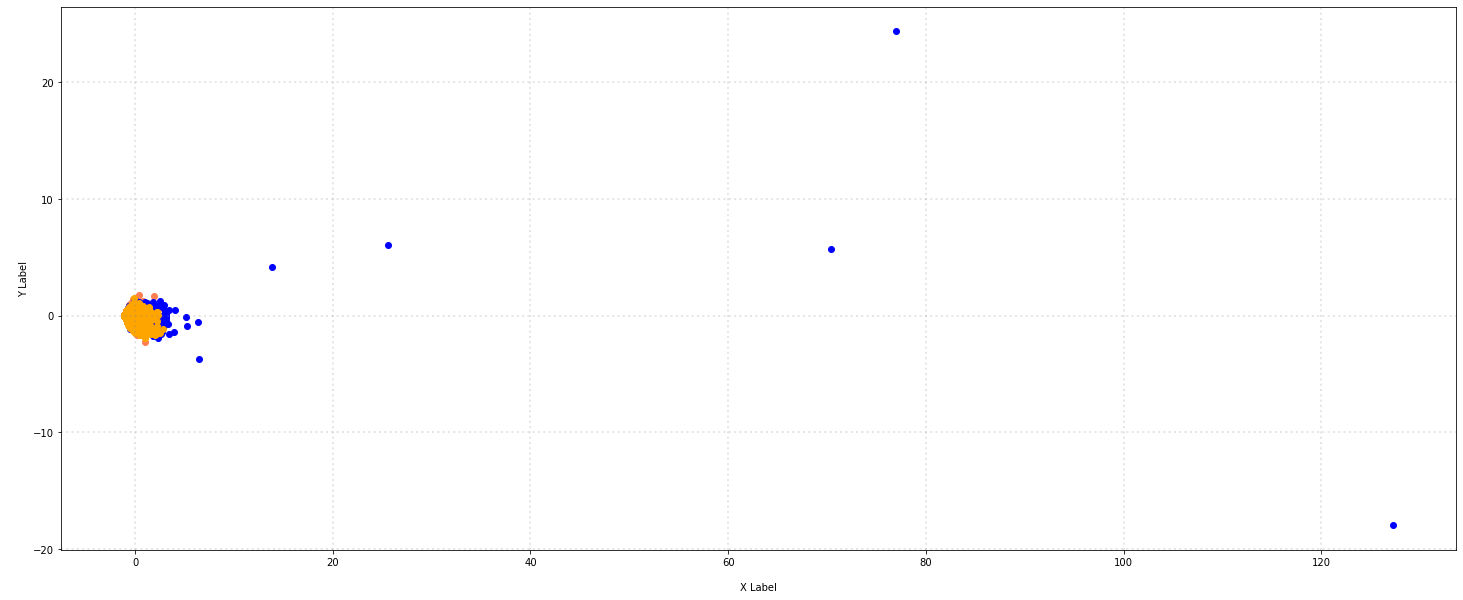

In [162]:
col = ['coral', 'blue', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, websites in zip(col, website):
    xs = X_reduced[data['website'] == websites].T[0]
    ys = X_reduced[data['website'] == websites].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

(2711, 3)
['amazon', 'imdb', 'yelp']


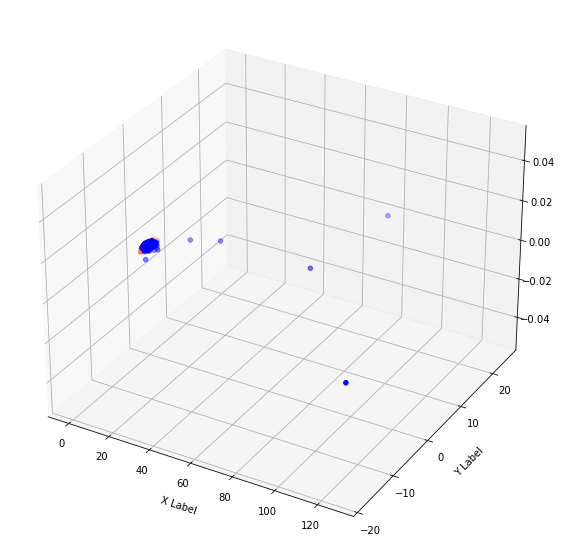

In [163]:
# Answer here
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)
print(website)

col = ['coral', 'blue', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection='3d')

for c, websites in zip(col, website):
    xs = X_reduced[data['website'] == websites].T[0]
    ys = X_reduced[data['website'] == websites].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### 5.5 Attribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionality reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!

In [192]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [193]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [194]:
term_frequencies[0] #sum of first term

1

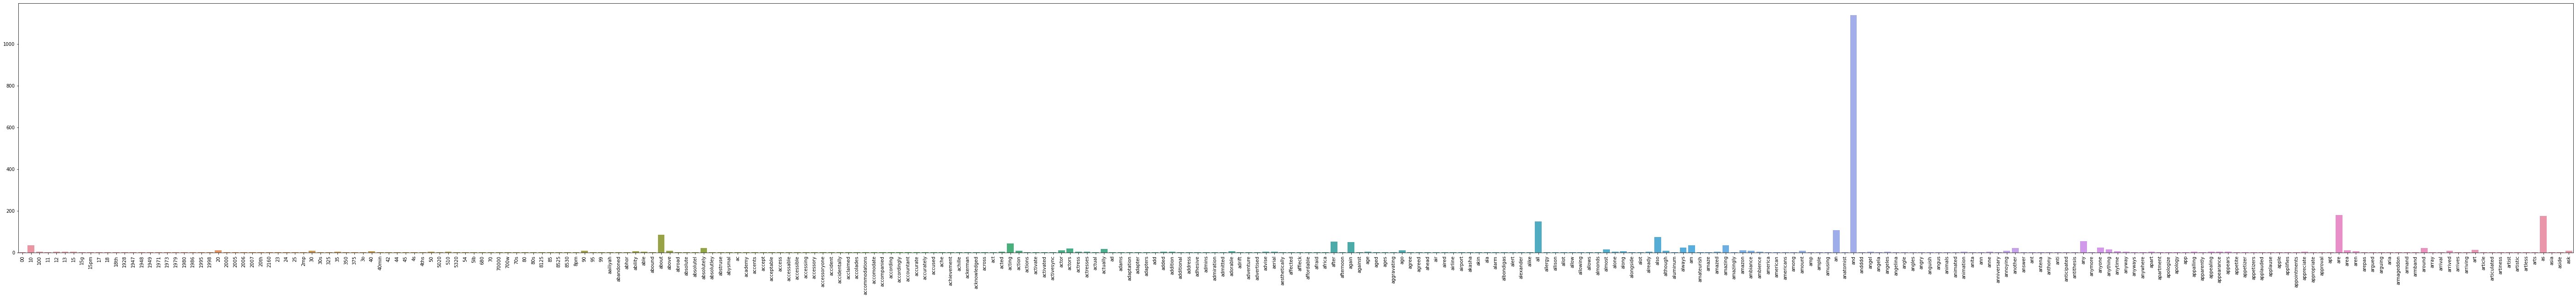

In [195]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [196]:
# Answer herez
import plotly.express as px
import plotly.graph_objects as go
#create dataframe
df = {'feature_names': count_vect.get_feature_names()[:300], 'frequencies': term_frequencies[:300]} 
px.histogram(df, x="feature_names", y="frequencies")

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [198]:
# Answer here
## only plot frequencies bigger or equal to 5
import plotly.express as px
import plotly.graph_objects as go
#create dataframe
new_df = pd.DataFrame.from_dict(df)
new_df = new_df[new_df["frequencies"]>=5]
px.histogram(new_df, x="feature_names", y="frequencies")

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [199]:
# Answer here
# Answer herez
import plotly.express as px
import plotly.graph_objects as go
#create dataframe
df = pd.DataFrame({'feature_names': count_vect.get_feature_names()[:300], 'frequencies': term_frequencies[:300]})
df = df.sort_values(by='frequencies', ascending=False)
px.histogram(df, x="feature_names", y="frequencies")

In [200]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

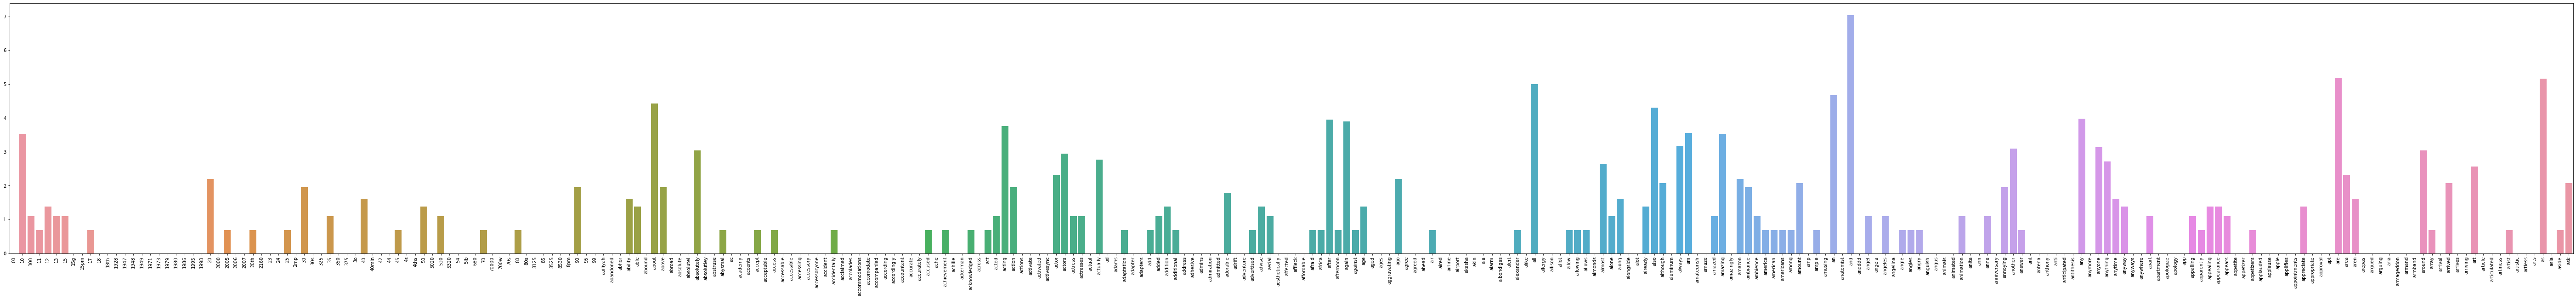

In [201]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [202]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [203]:
mlb = preprocessing.LabelBinarizer()

In [204]:
mlb.fit(data.website)

LabelBinarizer()

In [205]:
data['bin_category'] = mlb.transform(data['score']).tolist()

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:608: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [206]:
data[0:9]

,sentence,score,website,unigrams,bin_category
0,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]","[0, 0, 0]"
1,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]","[0, 0, 0]"
2,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin...","[0, 0, 0]"
3,The mic is great.,1,amazon,"[The, mic, is, great, .]","[0, 0, 0]"
4,I have to jiggle the plug to get it to line up...,0,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ...","[0, 0, 0]"
5,If you have several dozen or several hundred c...,0,amazon,"[If, you, have, several, dozen, or, several, h...","[0, 0, 0]"
6,If you are Razr owner...you must have this!,1,amazon,"[If, you, are, Razr, owner, ..., you, must, ha...","[0, 0, 0]"
7,"Needless to say, I wasted my money.",0,amazon,"[Needless, to, say, ,, I, wasted, my, money, .]","[0, 0, 0]"
8,What a waste of money and time!.,0,amazon,"[What, a, waste, of, money, and, time, !, .]","[0, 0, 0]"


### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [207]:
# Answer here
data['bin_category'] = mlb.fit_transform(data['website']).tolist()
data[0:9]

,sentence,score,website,unigrams,bin_category
0,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
1,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]"
2,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
3,The mic is great.,1,amazon,"[The, mic, is, great, .]","[1, 0, 0]"
4,I have to jiggle the plug to get it to line up...,0,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
5,If you have several dozen or several hundred c...,0,amazon,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
6,If you are Razr owner...you must have this!,1,amazon,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
7,"Needless to say, I wasted my money.",0,amazon,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"
8,What a waste of money and time!.,0,amazon,"[What, a, waste, of, money, and, time, !, .]","[1, 0, 0]"


# 6. Data Exploration

In [208]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = data.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [209]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['A usable keyboard actually turns a PDA into a real-world useful machine instead of just a neat gadget.']
['Definitely a bargain.']
['I had absolutely no problem with this headset linking to my 8530 Blackberry Curve!']


In [210]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [211]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# 7. New Data Visualization

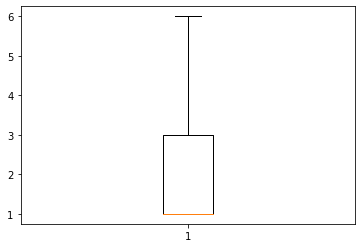

In [235]:
## histograms
## website distribution
"""
Show the frequency of all vocabulary (not only 300) box plot, and keep the outlier out.
We can see the box plot and its percentile of the frequency.
"""
tmp = {'feature_names': count_vect.get_feature_names()[:], 'frequencies': term_frequencies[:]} 
# px.histogram(df, x="feature_names", y="frequencies")
tmp =tmp["frequencies"][1:]
plt.boxplot(tmp, showfliers=False)
# show plot
plt.show()

In [258]:
## We choose the word frequency to show the histogram of each website by right-tail
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data[data["website"]=="amazon"].sentence) #learn the vocabulary and return document-term matrix
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
tmp_term_frequencies =[]
for k in term_frequencies:
    tmp_term_frequencies.append(k[0])
df = pd.DataFrame({'feature_names': count_vect.get_feature_names()[:], 'frequencies': tmp_term_frequencies[:]})
df = df.sort_values(by='frequencies', ascending=True)
px.histogram(df, x="feature_names", y="frequencies")

In [259]:
## We choose the word frequency to show the histogram of each website by right-tail
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data[data["website"]=="imdb"].sentence) #learn the vocabulary and return document-term matrix
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
tmp_term_frequencies =[]
for k in term_frequencies:
    tmp_term_frequencies.append(k[0])
df = pd.DataFrame({'feature_names': count_vect.get_feature_names()[:], 'frequencies': tmp_term_frequencies[:]})
df = df.sort_values(by='frequencies', ascending=True)
px.histogram(df, x="feature_names", y="frequencies")

In [261]:
## We choose the word frequency to show the histogram of each website by right-tail
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data[data["website"]=="yelp"].sentence) #learn the vocabulary and return document-term matrix
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
tmp_term_frequencies =[]
for k in term_frequencies:
    tmp_term_frequencies.append(k[0])
df = pd.DataFrame({'feature_names': count_vect.get_feature_names()[:], 'frequencies': tmp_term_frequencies[:]})
df = df.sort_values(by='frequencies', ascending=True)
px.histogram(df, x="feature_names", y="frequencies")

# 8. TF-IDF Feature

In [212]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

amazon_list =[]
for tmp_list in data[data["website"]=="amazon"]["sentence"]:
    amazon_list.append(tmp_list)
tf_idf_scores = vectorizer.fit_transform(amazon_list)
df_tfidf = pd.DataFrame(tf_idf_scores.toarray(),columns=vectorizer.get_feature_names())
print(len(vectorizer.get_feature_names()))
print(tf_idf_scores.shape)
print(df_tfidf)

imdb_list =[]
for tmp_list in data[data["website"]=="imdb"]["sentence"]:
    imdb_list.append(tmp_list)
tf_idf_scores = vectorizer.fit_transform(imdb_list)
df_tfidf = pd.DataFrame(tf_idf_scores.toarray(),columns=vectorizer.get_feature_names())
print(len(vectorizer.get_feature_names()))
print(tf_idf_scores.shape)
print(df_tfidf)

yelp_list =[]
for tmp_list in data[data["website"]=="yelp"]["sentence"]:
    yelp_list.append(tmp_list)

tf_idf_scores = vectorizer.fit_transform(yelp_list)
df_tfidf = pd.DataFrame(tf_idf_scores.toarray(),columns=vectorizer.get_feature_names())
print(len(vectorizer.get_feature_names()))
print(tf_idf_scores.shape)
print(df_tfidf)

1844
(979, 1844)
      10  100   11   12   13   15  15g   18   20  2000  ...  wrongly  year  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...      ...   ...   
974  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   
975  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   
976  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   
977  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   
978  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   

     years  yell  yes  yet      you      your 

# 9. Naive Bayes Classifier

In [213]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(data["sentence"], data["website"])
labels = model.predict(data["sentence"])

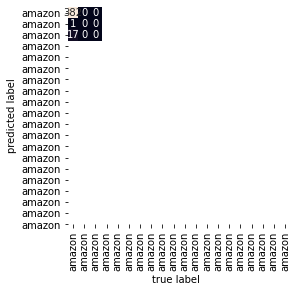

In [216]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(data["website"][0:400], labels[0:400])
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=data["website"][0:20], yticklabels=data["website"][0:20])
plt.xlabel('true label')
plt.ylabel('predicted label');

# 10. 反思

1. Exercise 1: In Data preprocessing, it is quite hard for us to process data so smoothly. For instance, the data type may not be clear csv format. It is possible that it is a dict type, json type, or even dataframe type with meaningless index. So the first step we need to preprocess it according to each data type.
2. Exercise 4: When data is enormous, the null value often hard to find since the data input by others may preprocess by different way. I recommend that we can use a technique first to find the null value containing string value, so the nan may not be "nan" but the try null value.
3. Duplicate Data: Sometime in big data, the duplicate data may not be totally same, it may appear with different format. For instance, the question mark "?" or the concluding mark "." will lead the duplcate function to malfunction. Therefore, I recommend when dealing the big data, we can try to select the resemble item then using iterate technique to find the difference.
4. When doing the PCA, we can still reduce it to bigger than two-dimension if the data is not too big. Most of the work reduce to two-dimesion are aim to have better visulization, but it does not mean it can effictively process the data in further step.
5. About the heatmap, the most obvious work is applying the confusion matrix to it. Therefore, about the naive Bayes Classifier, we still can use the confusion matrix to find further imformation when we consider the conditional probability.